## Observations and Insights 

In [55]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files - up one level and renamed
mouse_metadata_path = os.path.join("..", "Resources", "Mouse_metadata.csv")
study_results_path = os.path.join("..", "Resources", "Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combineData = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
combineData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [59]:
# Checking the number of mice.
#with duplicates
duplicateCount = combineData["Mouse ID"].count()
print(duplicateCount)

mouseCount = combineData["Mouse ID"].nunique()
print(mouseCount)

1893
249


In [71]:
#dropping duplicates
dropDuplicates = combineData.drop_duplicates(subset = "Mouse ID", keep = "last")
print(dropDuplicates.shape[0])
dropDuplicates

249


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [70]:
# I don't think I need this
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicateRows = combineData[combineData.duplicated(["Mouse ID", "Timepoint"])]
#duplicateRows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [69]:
# Optional: Get all the data for the duplicate mouse ID. 
#allDuplicateRows = combineData[combineData.duplicated(["Mouse ID"])]
#allDuplicateRows

In [72]:
#old - I think the one above is right
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#cleanData = combineData.drop_duplicates("Mouse ID")
#print(combineData.shape[0])

#cleanData

1893


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [7]:
# Checking the number of mice in the clean DataFrame.

## Summary Statistics

In [74]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = dropDuplicates.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = dropDuplicates.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = dropDuplicates.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = dropDuplicates.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = dropDuplicates.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summaryData = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summaryData

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [78]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drugBar = pd.DataFrame(dropDuplicates.groupby(["Drug Regimen"]).count()).reset_index()

#Filter dataframe to two columns
drugBar_df = drugBar[["Drug Regimen", "Mouse ID"]]
drugBar_df = drugBar_df.set_index("Drug Regimen")

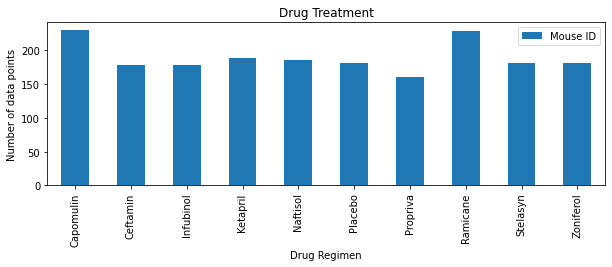

<Figure size 432x288 with 0 Axes>

In [11]:
drugBar_df.plot(kind = "bar", figsize=(10,3))

plt.title("Drug Treatment")
plt.ylabel("Number of data points")
plt.show()
plt.tight_layout()

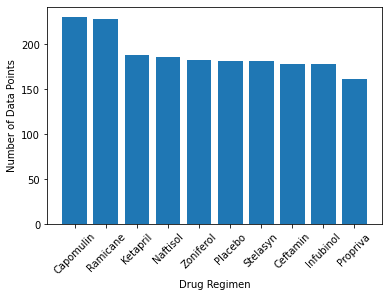

In [87]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#the numbers are the same in pyplot and pandas but the order is different

x_axis = combineData["Drug Regimen"].value_counts().index
y_axis = combineData["Drug Regimen"].value_counts()
plt.bar(x_axis, y_axis)
plt.xticks(rotation=45)
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.show()

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(dropDuplicates.groupby(["Sex"]).count()).reset_index()
#gender_df.head()

gender_df = gender_df[["Sex", "Mouse ID"]]
gender_df.head()

,Sex,Mouse ID
0,Female,124
1,Male,125


Text(0, 0.5, '')

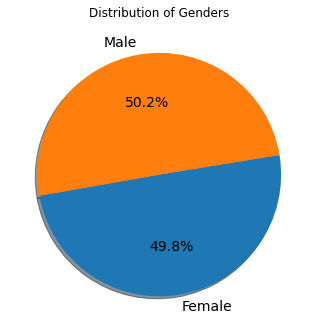

In [89]:
plt.figure(figsize=(12,6))
ax1 = plt.subplot(121, aspect="equal")
gender_df.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%',
              startangle=190, shadow=True, labels=gender_df["Sex"], legend = False, fontsize=14)


plt.title("Distribution of Genders")
plt.xlabel("")
plt.ylabel("")

In [90]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = (dropDuplicates.groupby(["Sex"])["Age_months"].count()).tolist()
gender

labels = ["Male", "Female"]
colors = ["orange", "blue"]
explode = (0.1, 0)

(-1.1682159660731721,
 1.107193254241077,
 -1.2295080256530446,
 1.110746532244119)

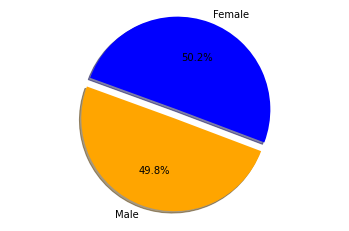

In [91]:
#create the pie chart
plt.pie(gender, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [92]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
dropDuplicates.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [93]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

Capomulin = dropDuplicates.loc[dropDuplicates["Drug Regimen"] == "Capomulin"]
Ramicane = dropDuplicates.loc[dropDuplicates["Drug Regimen"] == "Ramicane"]
Infubinol = dropDuplicates.loc[dropDuplicates["Drug Regimen"] == "Infubinol"]
Ceftamin = dropDuplicates.loc[dropDuplicates["Drug Regimen"] == "Ceftamin"]
x_axisCap = Capomulin["Tumor Volume (mm3)"]
x_axisRam = Ramicane["Tumor Volume (mm3)"]
x_axisInf = Infubinol["Tumor Volume (mm3)"]
x_axisCef = Ceftamin["Tumor Volume (mm3)"]

quartiles_Cap = x_axisCap.quantile([.25, .5, .75])
lowerq_Cap = quartiles_Cap[0.25]
upperq_Cap = quartiles_Cap[0.75]
IQR_Cap = upperq_Cap - lowerq_Cap
lower_boundCap =lowerq_Cap - (1.5*IQR_Cap)
upper_boundCap = upperq_Cap + (1.5*IQR_Cap)

print("Capomulin:")
#print(quartiles_Cap)
print(f"The lower quartile is: {lowerq_Cap}")
print(f"The upper quartile is: {upperq_Cap}")
print(f"The median is {quartiles_Cap[0.5]}")
print(f"The interquartile range is: {IQR_Cap}")
print(f"Values below {lower_boundCap} could be outliers.")
print(f"Values above {upper_boundCap} could be outliers.")

#---------

quartiles_Ram = x_axisRam.quantile([.25, .5, .75])
lowerq_Ram = quartiles_Ram[0.25]
upperq_Ram = quartiles_Ram[0.75]
IQR_Ram = upperq_Ram - lowerq_Ram
lower_boundRam =lowerq_Ram - (1.5*IQR_Ram)
upper_boundRam = upperq_Ram + (1.5*IQR_Ram)

print("Ramicane:")
print(f"The lower quartile is: {lowerq_Ram}")
print(f"The upper quartile is: {upperq_Ram}")
print(f"The median is {quartiles_Ram[0.5]}")
print(f"The interquartile range is: {IQR_Ram}")
print(f"Values below {lower_boundRam} could be outliers.")
print(f"Values above {upper_boundRam} could be outliers.")

#---------

quartiles_Inf = x_axisInf.quantile([.25, .5, .75])
lowerq_Inf = quartiles_Inf[0.25]
upperq_Inf = quartiles_Inf[0.75]
IQR_Inf = upperq_Inf - lowerq_Inf
lower_boundInf =lowerq_Inf - (1.5*IQR_Inf)
upper_boundInf = upperq_Inf + (1.5*IQR_Inf)

print("Infubinol:")
print(f"The lower quartile is: {lowerq_Inf}")
print(f"The upper quartile is: {upperq_Inf}")
print(f"The median is {quartiles_Inf[0.5]}")
print(f"The interquartile range is: {IQR_Inf}")
print(f"Values below {lower_boundInf} could be outliers.")
print(f"Values above {upper_boundInf} could be outliers.")

#---------

quartiles_Cef = x_axisCef.quantile([.25, .5, .75])
lowerq_Cef = quartiles_Cef[0.25]
upperq_Cef = quartiles_Cef[0.75]
IQR_Cef = upperq_Cef - lowerq_Cef
lower_boundCef =lowerq_Cef - (1.5*IQR_Cef)
upper_boundCef = upperq_Cef + (1.5*IQR_Cef)

print("Ceftamin:")
print(f"The lower quartile is: {lowerq_Cef}")
print(f"The upper quartile is: {upperq_Cef}")
print(f"The median is {quartiles_Cef[0.5]}")
print(f"The interquartile range is: {IQR_Cef}")
print(f"Values below {lower_boundCef} could be outliers.")
print(f"Values above {upper_boundCef} could be outliers.")



Capomulin:
The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The median is 38.1251644
The interquartile range is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Ramicane:
The lower quartile is: 31.56046955
The upper quartile is: 40.65900627
The median is 36.56165229
The interquartile range is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Infubinol:
The lower quartile is: 54.04860769
The upper quartile is: 65.52574285
The median is 60.16518046
The interquartile range is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Ceftamin:
The lower quartile is: 48.72207785
The upper quartile is: 64.29983003
The median is 59.85195552
The interquartile range is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


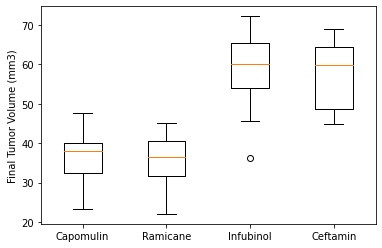

In [94]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot([x_axisCap, x_axisRam, x_axisInf, x_axisCef])
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

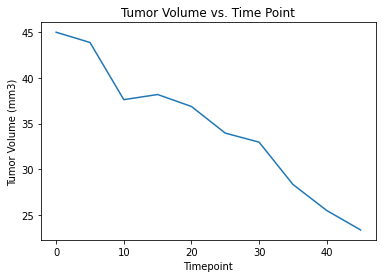

In [96]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

x_axis = combineData.loc[combineData["Mouse ID"] == "s185"]
x_axis = x_axis["Timepoint"]
y_axis = combineData.loc[combineData["Mouse ID"] == "s185"]
y_axis = y_axis["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.title("Tumor Volume vs. Time Point")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

Text(0, 0.5, 'Tumor Volume (mm3)')

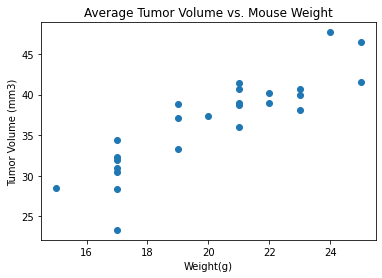

In [97]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

CapomulinScatter = dropDuplicates.loc[dropDuplicates["Drug Regimen"] == "Capomulin"]
CapomulinScatter

mouseWeight = CapomulinScatter["Weight (g)"]
tumorVolume = CapomulinScatter["Tumor Volume (mm3)"]
plt.scatter(mouseWeight, tumorVolume)
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight(g)")
plt.ylabel("Tumor Volume (mm3)")

The correlation between both weight and tumor volume is 0.88


Text(0, 0.5, 'Tumor Volume (mm3)')

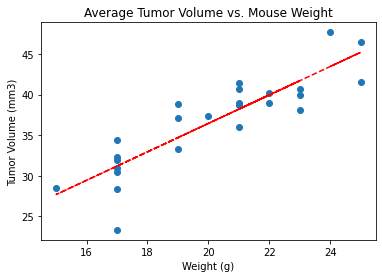

In [98]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(mouseWeight, tumorVolume)
print(f"The correlation between both weight and tumor volume is {round(correlation[0],2)}")

slope, int, r, p, std_err = st.linregress(mouseWeight, tumorVolume)
fit = slope * mouseWeight + int
plt.scatter(mouseWeight, tumorVolume)
plt.plot(mouseWeight, fit, "--", color="r")
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")